<a href="https://colab.research.google.com/github/savastakan/codes/blob/main/Hitit_resnet50V2_32label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pathlib
data_directory = pathlib.Path("/content/drive/MyDrive/Projeler/hitit_projesi/subdataset")

In [4]:
img_height,img_width=280, 280
batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_directory,
  validation_split=0.2,
  subset="training",
  seed=42,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_directory,
  validation_split=0.2,
  subset="validation",
  seed=42,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3117 files belonging to 32 classes.
Using 2494 files for training.
Found 3117 files belonging to 32 classes.
Using 623 files for validation.


In [5]:
model = Sequential()
pretrained_model= tf.keras.applications.ResNet50V2(include_top=False, input_shape=(280,280,3), pooling='avg',classes=191, weights='imagenet')

for each_layer in pretrained_model.layers:
        each_layer.trainable=False

model.add(pretrained_model)

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(32, activation='softmax'))

94668760/94668760 [==============================] - 1s 0us/step


In [6]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
78/78 [==============================] - 690s 8s/step - loss: 78.2631 - accuracy: 0.0477 - val_loss: 11.6578 - val_accuracy: 0.0482
Epoch 2/10
78/78 [==============================] - 25s 298ms/step - loss: 8.9641 - accuracy: 0.0585 - val_loss: 7.2019 - val_accuracy: 0.0498
Epoch 3/10
78/78 [==============================] - 26s 305ms/step - loss: 6.1947 - accuracy: 0.0834 - val_loss: 5.3714 - val_accuracy: 0.0610
Epoch 4/10
78/78 [==============================] - 26s 300ms/step - loss: 4.2203 - accuracy: 0.0694 - val_loss: 3.4695 - val_accuracy: 0.0787
Epoch 5/10
78/78 [==============================] - 26s 295ms/step - loss: 3.4617 - accuracy: 0.0694 - val_loss: 3.4618 - val_accuracy: 0.0803
Epoch 6/10
78/78 [==============================] - 26s 318ms/step - loss: 3.4524 - accuracy: 0.0706 - val_loss: 3.4522 - val_accuracy: 0.0803
Epoch 7/10
78/78 [==============================] - 26s 316ms/step - loss: 3.4431 - accuracy: 0.0718 - val_loss: 3.4441 - val_accuracy: 0.0803

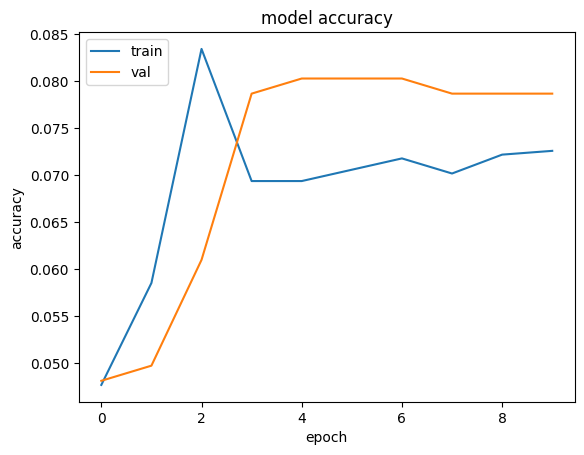

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()